In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, interpolate
np.random.seed(5)

In [2]:
# データ生成
n_sample = 10
time_series = np.zeros([3, n_sample])
time_series[0,:] = np.sort(np.random.random(n_sample))
time_series[1,:] = np.random.randn(n_sample)
time_series[2,0] = 10
for i in range(1,n_sample):
    time_series[2,i] = time_series[2,i-1]+time_series[1,i]

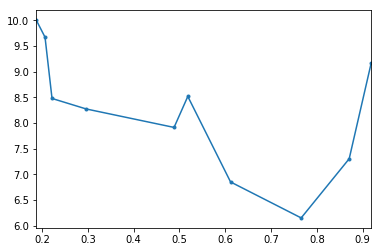

In [3]:
# プロット
plt.figure()
plt.plot(time_series[0,:],time_series[2,:], ".-")
plt.xlim([min(time_series[0,:]),max(time_series[0,:])])
plt.show()

In [4]:
# 線形補間
f = interpolate.interp1d(time_series[0,:],time_series[2,:])

In [5]:
# 両端の探索
kizami = 0.05
tt = np.linspace(0,1,int((1+kizami)/kizami))
for i in tt:
    if i>min(time_series[0,:]):
        x_min = i
        break
for i in tt:
    if i>max(time_series[0,:]):
        x_max = i-kizami
        break
t = np.linspace(x_min, x_max,int((x_max-x_min+kizami)/kizami))

In [6]:
# 線形補完
f(t)

array([9.7867979 , 8.4006625 , 8.26649722, 8.17286233, 8.07922743,
       7.98559253, 8.14672443, 7.95375757, 7.0618353 , 6.67859206,
       6.45150303, 6.224414  , 6.52663187, 7.07583151, 8.43892224])

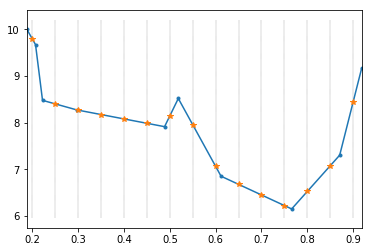

In [7]:
# プロット
plt.figure()
plt.plot(time_series[0,:],time_series[2,:],".-")
plt.plot(t,f(t),"*")
plt.xlim([min(time_series[0,:]),max(time_series[0,:])])
plt.vlines(tt, *plt.ylim(), linestyle='dashed', linewidth=0.2)
plt.show()